<a href="https://colab.research.google.com/github/mallikaalvala/Machine-learning-Models/blob/main/EDA_NYC_Taxi_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
%pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
df = pd. read_parquet('/content/2023-1.parquet')
df.info()

# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/sample_data/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()
SAMPLE_PERCENTAGE = 0.01

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        datetime_col = 'tpep_pickup_datetime' if 'tpep_pickup_datetime' in df_month.columns else 'pickup_datetime'
        df_month[datetime_col] = pd.to_datetime(df_month[datetime_col])
        df_month['date'] = df_month[datetime_col].dt.date
        df_month['hour'] = df_month[datetime_col].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        unique_dates = df_month['date'].unique()
        unique_hours = df_month['hour'].unique()


        # Loop through dates and then loop through every hour of each date
        for current_date in unique_dates:
            # Filter data for the current date
            date_data = df_month[df_month['date'] == current_date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                # Filter data for the current hour
                  hourly_data = date_data[date_data['hour'] == hour]

                # Sample 1% of the hourly data randomly
                  if not hourly_data.empty:
                      sample_size = max(1, int(len(hourly_data) * SAMPLE_PERCENTAGE))
                      hourly_sample = hourly_data.sample(n=sample_size, random_state=42)

                # add data of this hour to the dataframe
                      sampled_data = pd.concat([sampled_data, hourly_sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"Processed {file_name}: Original size: {len(df_month)}, Sampled size: {len(sampled_data)}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(f"\nFinal combined dataframe size: {len(df)}")
print(f"Total files processed: {len(file_list)}")

Processed 2023-8.parquet: Original size: 2875947, Sampled size: 28414
Processed 2023-1.parquet: Original size: 3041714, Sampled size: 30067
Processed 2023-4.parquet: Original size: 2792901, Sampled size: 27569
Processed 2023-6.parquet: Original size: 3258261, Sampled size: 32259
Processed 2023-12.parquet: Original size: 3333925, Sampled size: 32983
Processed 2023-10.parquet: Original size: 3485185, Sampled size: 34492
Processed 2023-5.parquet: Original size: 2889185, Sampled size: 28596
Processed 2023-2.parquet: Original size: 3374086, Sampled size: 33421
Processed 2023-7.parquet: Original size: 3481547, Sampled size: 34477
Processed 2023-9.parquet: Original size: 2817156, Sampled size: 27824
Processed 2023-3.parquet: Original size: 3275796, Sampled size: 32405
Processed 2023-11.parquet: Original size: 3302857, Sampled size: 32679

Final combined dataframe size: 375186
Total files processed: 12


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet("2023_1percent_sampled_data.parquet")

In [ ]:
from google.colab import files
files.download("2023_1percent_sampled_data.parquet")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
pip install --upgrade numpy pandas pyarrow --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installatio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd. read_parquet('/content/2023_1percent_sampled_data.parquet')


In [ ]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,10.93,1.0,N,132,61,1,...,0.5,10.27,0.0,1.0,61.62,0.0,1.75,2023-07-01,0,NaN
1,2,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,10.49,1.0,N,230,95,1,...,0.5,4.00,0.0,1.0,54.70,2.5,0.00,2023-07-01,0,NaN
2,2,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.42,1.0,N,107,162,1,...,0.5,2.72,0.0,1.0,16.32,2.5,0.00,2023-07-01,0,NaN
3,2,2023-07-01 00:37:46,2023-07-01 00:45:30,3.0,1.10,1.0,N,249,79,1,...,0.5,2.86,0.0,1.0,17.16,2.5,0.00,2023-07-01,0,NaN
4,2,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.20,1.0,N,142,41,1,...,0.5,4.68,0.0,1.0,28.08,2.5,0.00,2023-07-01,0,NaN


In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375186 entries, 0 to 375185
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               375186 non-null  int64         
 1   tpep_pickup_datetime   375186 non-null  datetime64[us]
 2   tpep_dropoff_datetime  375186 non-null  datetime64[us]
 3   passenger_count        362431 non-null  float64       
 4   trip_distance          375186 non-null  float64       
 5   RatecodeID             362431 non-null  float64       
 6   store_and_fwd_flag     362431 non-null  object        
 7   PULocationID           375186 non-null  int64         
 8   DOLocationID           375186 non-null  int64         
 9   payment_type           375186 non-null  int64         
 10  fare_amount            375186 non-null  float64       
 11  extra                  375186 non-null  float64       
 12  mta_tax                375186 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

columns_to_drop = ['store_and_fwd_flag', 'mta_tax']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.head()




,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,10.93,1.0,132,61,1,47.1,1.0,10.27,0.0,1.0,61.62,0.0,1.75,2023-07-01,0,NaN
1,2,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,10.49,1.0,230,95,1,45.7,1.0,4.00,0.0,1.0,54.70,2.5,0.00,2023-07-01,0,NaN
2,2,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.42,1.0,107,162,1,8.6,1.0,2.72,0.0,1.0,16.32,2.5,0.00,2023-07-01,0,NaN
3,2,2023-07-01 00:37:46,2023-07-01 00:45:30,3.0,1.10,1.0,249,79,1,9.3,1.0,2.86,0.0,1.0,17.16,2.5,0.00,2023-07-01,0,NaN
4,2,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.20,1.0,142,41,1,18.4,1.0,4.68,0.0,1.0,28.08,2.5,0.00,2023-07-01,0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['Airport_fee_N'] = df['Airport_fee'].fillna(0) + df['airport_fee'].fillna(0)
    df.drop(['Airport_fee', 'airport_fee'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375186 entries, 0 to 375185
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               375186 non-null  int64         
 1   tpep_pickup_datetime   375186 non-null  datetime64[us]
 2   tpep_dropoff_datetime  375186 non-null  datetime64[us]
 3   passenger_count        362431 non-null  float64       
 4   trip_distance          375186 non-null  float64       
 5   RatecodeID             362431 non-null  float64       
 6   PULocationID           375186 non-null  int64         
 7   DOLocationID           375186 non-null  int64         
 8   payment_type           375186 non-null  int64         
 9   fare_amount            375186 non-null  float64       
 10  extra                  375186 non-null  float64       
 11  tip_amount             375186 non-null  float64       
 12  tolls_amount           375186 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]

# Display them
negative_fares.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee_N


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
ratecode_distribution = negative_fares['RatecodeID'].value_counts()

print("RatecodeID distribution for negative fare_amounts:")
print(ratecode_distribution)


RatecodeID distribution for negative fare_amounts:
Series([], Name: count, dtype: int64)


In [ ]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include='number').columns
negative_value_columns = [col for col in numeric_cols if (df[col] < 0).any()]
print("Columns with negative values:")
print(negative_value_columns)


Columns with negative values:
['extra', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee_N']


In [ ]:
# fix these negative values
negative_cols = [col for col in numeric_cols if (df[col] < 0).any()]
for col in negative_cols:
    df[col] = df[col].apply(lambda x: max(x, 0))
    print(f"Fixed negative values in {col}")
    print(df[col].describe())
    print()

df.head()



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee_N
0,2,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,10.93,1.0,132,61,1,47.1,1.0,10.27,0.0,1.0,61.62,0.0,2023-07-01,0,1.75
1,2,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,10.49,1.0,230,95,1,45.7,1.0,4.00,0.0,1.0,54.70,2.5,2023-07-01,0,0.00
2,2,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.42,1.0,107,162,1,8.6,1.0,2.72,0.0,1.0,16.32,2.5,2023-07-01,0,0.00
3,2,2023-07-01 00:37:46,2023-07-01 00:45:30,3.0,1.10,1.0,249,79,1,9.3,1.0,2.86,0.0,1.0,17.16,2.5,2023-07-01,0,0.00
4,2,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.20,1.0,142,41,1,18.4,1.0,4.68,0.0,1.0,28.08,2.5,2023-07-01,0,0.00


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean().sort_values(ascending=False)
print("Proportion of missing values in each column (%):")
print(missing_proportion)

Proportion of missing values in each column (%):
congestion_surcharge     0.033996
RatecodeID               0.033996
passenger_count          0.033996
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
VendorID                 0.000000
trip_distance            0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
PULocationID             0.000000
extra                    0.000000
tip_amount               0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
total_amount             0.000000
date                     0.000000
hour                     0.000000
Airport_fee_N            0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
null_rows = df[df.isnull().any(axis=1)]

print("Rows with missing (NaN) values:")
print(null_rows)

# Impute NaN values in 'passenger_count'
mean_passenger_count = df['passenger_count'].mean()
df['passenger_count'].fillna(mean_passenger_count, inplace=True)
df.head()

Rows with missing (NaN) values:
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
16             1  2023-07-01 00:18:46   2023-07-01 00:27:41              NaN   
29             2  2023-07-01 00:04:28   2023-07-01 00:16:27              NaN   
101            2  2023-07-01 03:33:48   2023-07-01 03:43:51              NaN   
119            2  2023-07-01 05:27:00   2023-07-01 05:53:00              NaN   
127            2  2023-07-01 06:49:24   2023-07-01 07:03:32              NaN   
...          ...                  ...                   ...              ...   
375170         2  2023-11-30 23:20:47   2023-11-30 23:32:36              NaN   
375174         2  2023-11-30 23:08:37   2023-11-30 23:21:37              NaN   
375176         1  2023-11-30 23:41:38   2023-11-30 23:49:45              NaN   
375178         2  2023-11-30 23:27:31   2023-11-30 23:45:13              NaN   
375179         1  2023-11-30 23:13:05   2023-11-30 23:44:24              NaN   

       

/tmp/ipython-input-2700938980.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(mean_passenger_count, inplace=True)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee_N
0,2,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,10.93,1.0,132,61,1,47.1,1.0,10.27,0.0,1.0,61.62,0.0,2023-07-01,0,1.75
1,2,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,10.49,1.0,230,95,1,45.7,1.0,4.00,0.0,1.0,54.70,2.5,2023-07-01,0,0.00
2,2,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.42,1.0,107,162,1,8.6,1.0,2.72,0.0,1.0,16.32,2.5,2023-07-01,0,0.00
3,2,2023-07-01 00:37:46,2023-07-01 00:45:30,3.0,1.10,1.0,249,79,1,9.3,1.0,2.86,0.0,1.0,17.16,2.5,2023-07-01,0,0.00
4,2,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.20,1.0,142,41,1,18.4,1.0,4.68,0.0,1.0,28.08,2.5,2023-07-01,0,0.00


In [ ]:
print("Missing values in 'passenger_count':", df['passenger_count'].isnull().sum())

Missing values in 'passenger_count': 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
mode_ratecode = df['RatecodeID'].mode()[0]

# Fill NaN with mode
df['RatecodeID'].fillna(mode_ratecode, inplace=True)

/tmp/ipython-input-3177707818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(mode_ratecode, inplace=True)


In [ ]:
print("Missing values in 'RatecodeID':", df['RatecodeID'].isnull().sum())

Missing values in 'RatecodeID': 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(0, inplace=True)
print("Missing values in 'congestion_surcharge':", df['congestion_surcharge'].isnull().sum())




Missing values in 'congestion_surcharge': 0


/tmp/ipython-input-872463752.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee_N
0,2023-09-01 00:39:59,2023-09-01 01:00:28,1.369188,4.71,1.0,113,238,0,24.83,4.32,0.00,1.0,33.15,0.0,2023-09-01,0,0.00
1,2023-09-01 00:24:50,2023-09-01 00:27:19,2.000000,0.56,1.0,142,142,2,5.10,0.00,0.00,1.0,10.10,2.5,2023-09-01,0,0.00
2,2023-09-01 00:19:27,2023-09-01 01:04:02,2.000000,18.46,2.0,132,163,1,70.00,15.71,6.94,1.0,98.40,2.5,2023-09-01,0,1.75
3,2023-09-01 00:42:13,2023-09-01 01:20:20,2.000000,13.71,1.0,249,180,4,59.70,0.00,0.00,1.0,64.70,2.5,2023-09-01,0,0.00
4,2023-09-01 00:11:38,2023-09-01 00:17:56,1.000000,0.71,1.0,144,232,1,7.90,2.00,0.00,1.0,14.90,2.5,2023-09-01,0,0.00


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print("Remaining missing values:\n", missing_summary)
print("Total remaining missing values:", df.isnull().sum().sum())


Remaining missing values:
 Series([], dtype: int64)
Total remaining missing values: 0


In [ ]:
print("Rows with missing (NaN) values:")


Rows with missing (NaN) values:


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
print(df.describe().T)



                          count                        mean  \
VendorID               375186.0                    1.734214   
tpep_pickup_datetime     375186  2023-07-02 02:43:34.439971   
tpep_dropoff_datetime    375186  2023-07-02 03:00:59.408406   
passenger_count        375186.0                     1.36716   
trip_distance          375186.0                     3.58102   
RatecodeID             375186.0                    1.618624   
PULocationID           375186.0                   165.30419   
DOLocationID           375186.0                  164.009243   
payment_type           375186.0                    1.163495   
fare_amount            375186.0                   20.171043   
extra                  375186.0                    1.583484   
tip_amount             375186.0                    3.540766   
tolls_amount           375186.0                    0.588144   
improvement_surcharge  375186.0                    0.998998   
total_amount           375186.0                   29.21

In [ ]:
 # Check for potential out of place values in various columns
import pandas as pd

report = {}

# Check for negative fare_amount
report['Negative Fare Amounts'] = df[df['fare_amount'] < 0].shape[0]

# Unusually high fare amounts
report['High Fare Amounts (> 500)'] = df[df['fare_amount'] > 500].shape[0]

# Zero or negative trip distances
report['Invalid Trip Distances (≤ 0)'] = df[df['trip_distance'] <= 0].shape[0]

# Extremely high trip distances
report['Unrealistic Trip Distances (> 100 mi)'] = df[df['trip_distance'] > 100].shape[0]

# Invalid passenger count
report['Invalid Passenger Count (≤ 0 or > 6)'] = df[(df['passenger_count'] <= 0) | (df['passenger_count'] > 6)].shape[0]

# Tip greater than fare
report['Tip Greater than Fare'] = df[df['tip_amount'] > df['fare_amount']].shape[0]

# Negative tip amount
report['Negative Tip Amount'] = df[df['tip_amount'] < 0].shape[0]

# Invalid RatecodeID
valid_ratecodes = [1, 2, 3, 4, 5, 6]
report['Invalid RatecodeID'] = df[~df['RatecodeID'].isin(valid_ratecodes)].shape[0]

# Invalid Payment Type
valid_payment_types = [1, 2, 3, 4, 5, 6]  # Based on NYC TLC data dictionary
if 'payment_type' in df.columns:
    report['Invalid Payment Type'] = df[~df['payment_type'].isin(valid_payment_types)].shape[0]

# Dropoff before pickup
pickup_col = 'tpep_pickup_datetime' if 'tpep_pickup_datetime' in df.columns else 'pickup_datetime'
dropoff_col = 'tpep_dropoff_datetime' if 'tpep_dropoff_datetime' in df.columns else 'dropoff_datetime'
if dropoff_col in df.columns:
    report['Dropoff Before Pickup'] = df[df[dropoff_col] < df[pickup_col]].shape[0]

# Invalid store_and_fwd_flag
if 'store_and_fwd_flag' in df.columns:
    report['Invalid store_and_fwd_flag'] = df[~df['store_and_fwd_flag'].isin(['Y', 'N'])].shape[0]

# Duplicate rows
report['Duplicate Rows'] = df.duplicated().sum()

# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
report['Columns with Missing Values'] = missing.to_dict()

# Create and display a report
summary_df = pd.DataFrame.from_dict(report, orient='index', columns=['Issue Count'])
print("\n🧾 Data Quality Summary Report:\n")
print(summary_df)


🧾 Data Quality Summary Report:

                                      Issue Count
Negative Fare Amounts                           0
High Fare Amounts (> 500)                       4
Invalid Trip Distances (≤ 0)                 7396
Unrealistic Trip Distances (> 100 mi)           9
Invalid Passenger Count (≤ 0 or > 6)         5758
Tip Greater than Fare                         526
Negative Tip Amount                             0
Invalid RatecodeID                           2095
Invalid Payment Type                        12755
Dropoff Before Pickup                          25
Duplicate Rows                                  0
Columns with Missing Values                    {}


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
initial_rows = len(df)
df = df[df['passenger_count'] <= 6]
print(f"Removed {initial_rows - len(df)} rows with passenger_count > 6.")

Removed 5 rows with passenger_count > 6.


In [ ]:
# Continue with outlier handling
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
condition = (df['trip_distance'] < 0) & (df['fare_amount'] > 300)
print(f"Removing {condition.sum()} rows where trip_distance ≈ 0 and fare_amount > 300.")
df = df[~condition]


Removing 0 rows where trip_distance ≈ 0 and fare_amount > 300.


In [ ]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
if 'PULocationID' in df.columns and 'DOLocationID' in df.columns:
    condition = (df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])
    print(f"Removing {condition.sum()} rows with 0 distance and fare, but different zones.")
    df = df[~condition]

Removing 9 rows with 0 distance and fare, but different zones.


In [ ]:
#Entries where trip_distance is more than 250 miles.
condition = df['trip_distance'] > 250
print(f"Removing {condition.sum()} trips with distance > 250 miles.")
df = df[~condition]


Removing 5 trips with distance > 250 miles.


In [ ]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
condition = df['payment_type'] == 0
print(f"Removing {condition.sum()} rows with payment_type = 0.")
df = df[df['payment_type'] != 0]

Removing 12752 rows with payment_type = 0.


In [ ]:
# Do any columns need standardising?
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].describe().T[['mean', 'std', 'min', 'max']])



                             mean         std  min        max
VendorID                 1.737395    0.440050  1.0       2.00
passenger_count          1.367065    0.890315  0.0       6.00
trip_distance            3.428920    4.528724  0.0     187.35
RatecodeID               1.640040    7.432426  1.0      99.00
PULocationID           165.464205   63.703364  1.0     265.00
DOLocationID           164.275314   69.715349  1.0     265.00
payment_type             1.204418    0.465750  1.0       4.00
fare_amount             20.088400  238.478628  0.0  143163.45
extra                    1.633345    1.828639  0.0      14.25
tip_amount               3.568401    4.038687  0.0     150.29
tolls_amount             0.587217    2.167509  0.0     143.00
improvement_surcharge    0.999292    0.024789  0.0       1.00
total_amount            29.196133  238.864182  0.0  143167.45
congestion_surcharge     2.309190    0.663791  0.0       2.50
Airport_fee_N            0.141688    0.462878  0.0       1.75


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee_N']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
numerical_vars_auto = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars_auto = df.select_dtypes(include='object').columns.tolist()
datetime_vars_auto = df.select_dtypes(include='datetime').columns.tolist()

print("📊 Inferred Numerical Variables:", numerical_vars_auto)
print("🧾 Inferred Categorical Variables:", categorical_vars_auto)
print("🕒 Inferred Datetime Variables:", datetime_vars_auto)

📊 Inferred Numerical Variables: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee_N']
🧾 Inferred Categorical Variables: ['date']
🕒 Inferred Datetime Variables: ['tpep_pickup_datetime', 'tpep_dropoff_datetime']


In [ ]:
#The following monetary parameters belong in the same category, is it categorical or numerical?

fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee

##### Answer:  Numerical variables #####

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

/tmp/ipython-input-113329953.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='pickup_count', data=hourly_pickups, palette='flare')


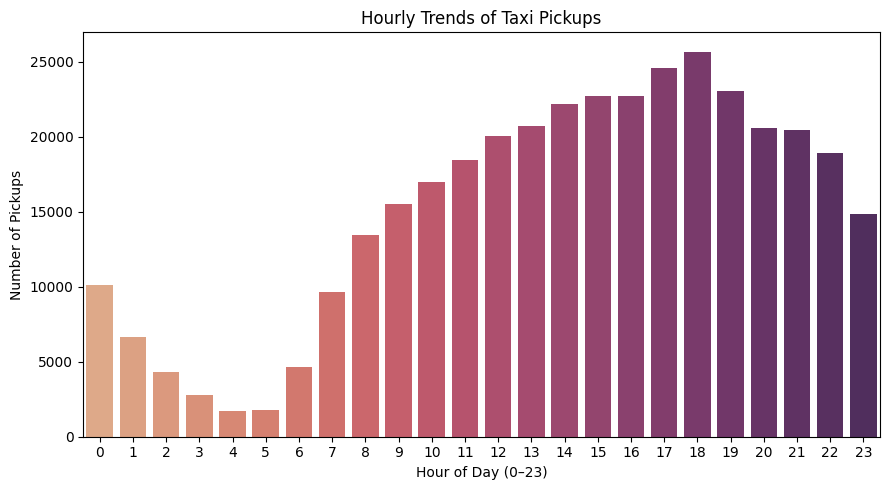

In [ ]:
# Find and show the hourly trends in taxi pickups
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'pickup_hour' exists; if not, extract it from datetime
if 'pickup_hour' not in df.columns:
    df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

# Group by pickup hour and count trips
hourly_pickups = df.groupby('pickup_hour').size().reset_index(name='pickup_count')

# Plotting
plt.figure(figsize=(9, 5))
sns.barplot(x='pickup_hour', y='pickup_count', data=hourly_pickups, palette='flare')
plt.title('Hourly Trends of Taxi Pickups')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



/tmp/ipython-input-1593610742.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='crest')


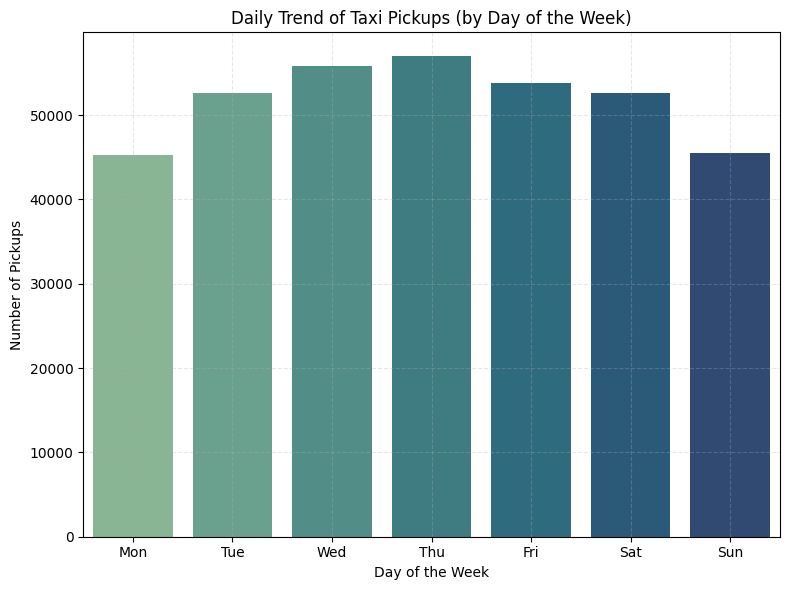

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
import matplotlib.pyplot as plt
import seaborn as sns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract day of week (0 = Monday, 6 = Sunday)
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['pickup_day_name'] = df['pickup_dayofweek'].map(day_map)

# Group by day name and count pickups
daily_pickups = df['pickup_day_name'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='crest')
plt.title('Daily Trend of Taxi Pickups (by Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4000272597.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='viridis')
/tmp/ipython-input-4000272597.py:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


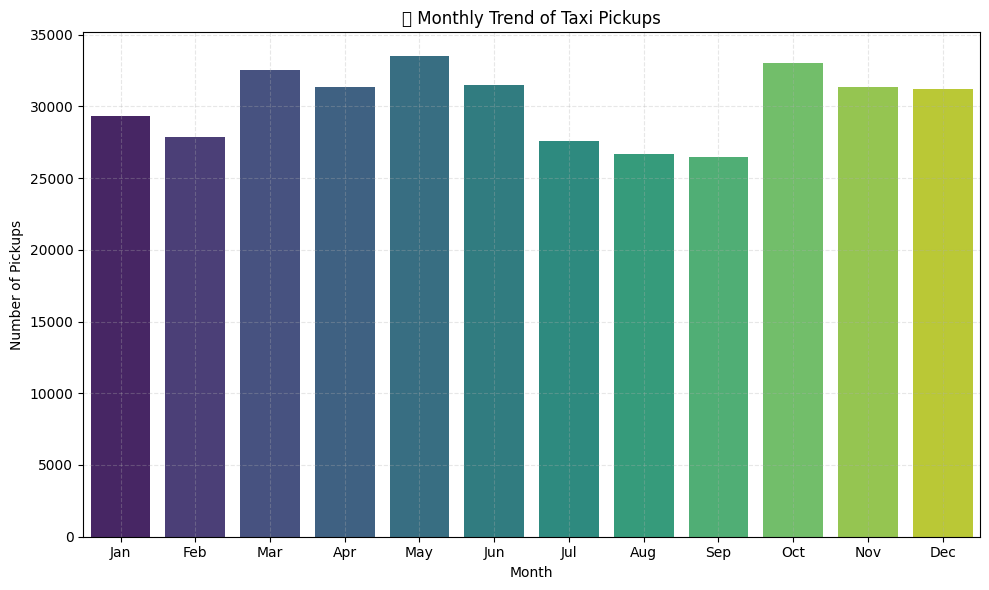

In [ ]:
# Show the monthly trends in pickups

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime column is in correct format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract month from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['pickup_month_name'] = df['pickup_month'].map(month_map)
monthly_pickups = df['pickup_month_name'].value_counts().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='viridis')
plt.title('Monthly Trend of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
# Columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Dictionary to store results
zero_negative_summary = {}

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    total = len(df)

    zero_negative_summary[col] = {
        'Zero Count': zero_count,
        'Zero %': round((zero_count / total) * 100, 2),
        'Negative Count': negative_count,
        'Negative %': round((negative_count / total) * 100, 2)
    }

# Display as DataFrame
pd.DataFrame(zero_negative_summary).T



,Zero Count,Zero %,Negative Count,Negative %
fare_amount,117.0,0.03,0.0,0.0
tip_amount,80792.0,22.29,0.0,0.0
total_amount,61.0,0.02,0.0,0.0
trip_distance,4486.0,1.24,0.0,0.0


from matplotlib import pyplot as plt
_df_0['Zero Count'].plot(kind='hist', bins=20, title='Zero Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Zero %'].plot(kind='hist', bins=20, title='Zero %')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Zero Count', y='Zero %', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Negative Count']
  ys = series['Zero Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Negative Count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Negative Count')
_ = plt.ylabel('Zero Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Negative Count']
  ys = series['Zero %']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Negative Count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Negative Count')
_ = plt.ylabel('Zero %')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Negative Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Negative Count'}, axis=1)
              .sort_values('Negative Count', ascending=True))
  xs = counted['Negative Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Negative Count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Negative Count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Negative %']
  ys = series['Zero Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Negative %', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Negative %')
_ = plt.ylabel('Zero Count')

from matplotlib import pyplot as plt
_df_8['Zero Count'].plot(kind='line', figsize=(8, 4), title='Zero Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Zero %'].plot(kind='line', figsize=(8, 4), title='Zero %')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Zero Count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Zero %', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

# Define the columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a condition that ensures all selected columns have non-zero values
non_zero_condition = (df[columns_to_check] != 0).all(axis=1)

# Filter the DataFrame
df_non_zero = df[non_zero_condition].copy()

# Show shape and preview
print(f" Filtered DataFrame shape: {df_non_zero.shape}")
df_non_zero.head()

 Filtered DataFrame shape: (279942, 24)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,congestion_surcharge,date,hour,Airport_fee_N,pickup_hour,pickup_dayofweek,pickup_day_name,pickup_month,pickup_month_name
0,2,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,10.93,1.0,132,61,1,47.1,...,61.62,0.0,2023-07-01,0,1.75,0,5,Sat,7,Jul
1,2,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,10.49,1.0,230,95,1,45.7,...,54.70,2.5,2023-07-01,0,0.00,0,5,Sat,7,Jul
2,2,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.42,1.0,107,162,1,8.6,...,16.32,2.5,2023-07-01,0,0.00,0,5,Sat,7,Jul
3,2,2023-07-01 00:37:46,2023-07-01 00:45:30,3.0,1.10,1.0,249,79,1,9.3,...,17.16,2.5,2023-07-01,0,0.00,0,5,Sat,7,Jul
4,2,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.20,1.0,142,41,1,18.4,...,28.08,2.5,2023-07-01,0,0.00,0,5,Sat,7,Jul


In [ ]:
df_non_zero.to_csv('cleaned_non_zero_data-130825.csv', index=False)
print("Data saved as cleaned_non_zero_data-130825.csv")

Data saved as cleaned_non_zero_data-130825.csv


In [ ]:
from google.colab import files
files.download("cleaned_non_zero_data-130825.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
df_non_zero = df_non_zero[df_non_zero['tpep_pickup_datetime'].dt.year == 2023]

In [ ]:
print("Min:", df_non_zero['tpep_pickup_datetime'].min())
print("Max:", df_non_zero['tpep_pickup_datetime'].max())

Min: 2023-01-01 00:04:34
Max: 2023-12-31 23:53:18


/tmp/ipython-input-3305582996.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_revenue, x='pickup_month', y='total_amount', palette='crest')
/tmp/ipython-input-3305582996.py:26: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


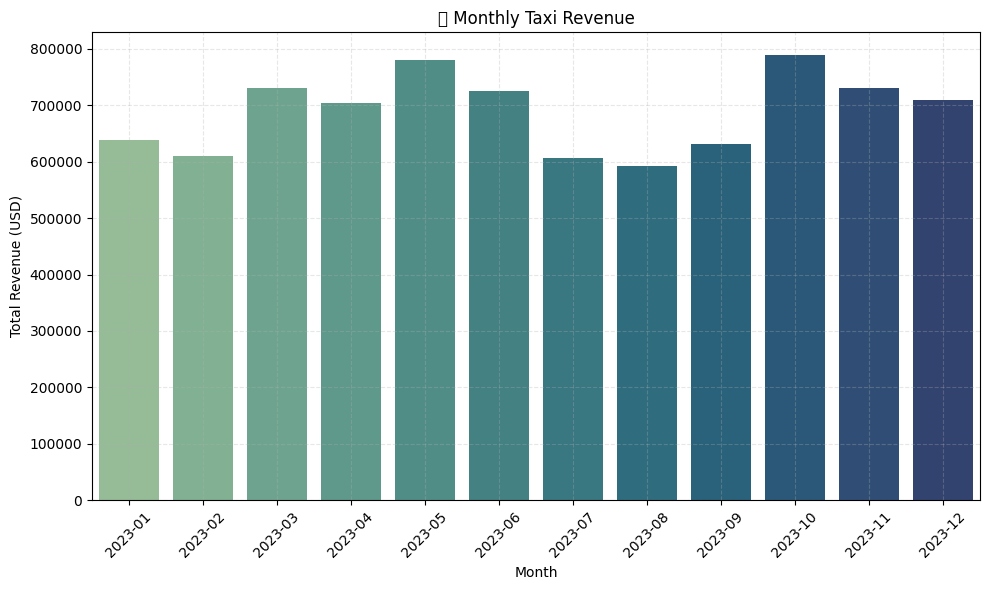

In [ ]:
# Group data by month and analyse monthly revenue
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime column is in datetime format
df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])

# Extract month and year (useful if data spans across years)
df_non_zero['pickup_month'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('M')

# Group by month and calculate total revenue
monthly_revenue = df_non_zero.groupby('pickup_month')['total_amount'].sum().reset_index()

# Convert Period to string for plotting
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_revenue, x='pickup_month', y='total_amount', palette='crest')
plt.title('💰 Monthly Taxi Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter

# Ensure datetime format is correct
df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])

# Extract quarter and year for grouping
df_non_zero['pickup_quarter'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and calculate total revenue
quarterly_revenue = df_non_zero.groupby('pickup_quarter')['total_amount'].sum().reset_index()

# Calculate total revenue
total_revenue = quarterly_revenue['total_amount'].sum()

# Add proportion column
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_revenue).round(4)

# Convert Period to string
quarterly_revenue['pickup_quarter'] = quarterly_revenue['pickup_quarter'].astype(str)

# Display the result
print("📊 Quarterly Revenue and Proportion:")
display(quarterly_revenue)


📊 Quarterly Revenue and Proportion:


,pickup_quarter,total_amount,proportion
0,2023Q1,1980008.13,0.2400
1,2023Q2,2209842.58,0.2679
2,2023Q3,1830033.40,0.2218
3,2023Q4,2230398.22,0.2703


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance
df_2023 = df_non_zero[
    (df_non_zero['trip_distance'] > 0) &
    (df_non_zero['tpep_pickup_datetime'].dt.year == 2023)]


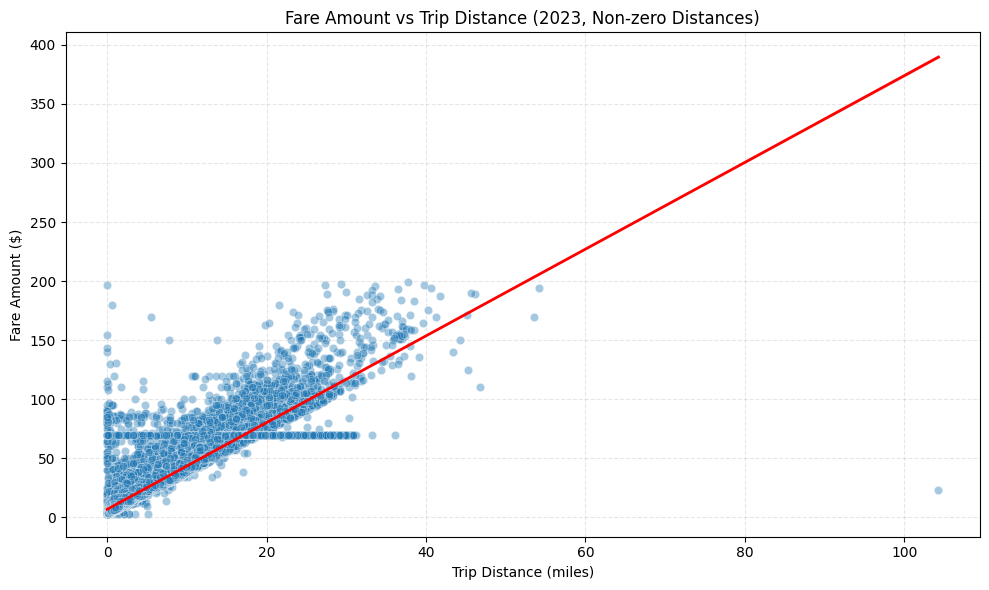

In [ ]:
# Show how trip fare is affected by distance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='fare_amount', alpha=0.4)
sns.regplot(data=filtered_df, x='trip_distance', y='fare_amount', scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('Fare Amount vs Trip Distance (2023, Non-zero Distances)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration
df_2023 = df_non_zero[
    (df_non_zero['tpep_pickup_datetime'].dt.year == 2023) &
    (df_non_zero['tpep_dropoff_datetime'] > df_non_zero['tpep_pickup_datetime'])]

df_2023['trip_duration_min'] = (df_2023['tpep_dropoff_datetime'] - df_2023['tpep_pickup_datetime']).dt.total_seconds() / 60



/tmp/ipython-input-1196517405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['trip_duration_min'] = (df_2023['tpep_dropoff_datetime'] - df_2023['tpep_pickup_datetime']).dt.total_seconds() / 60


/tmp/ipython-input-2010770966.py:12: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


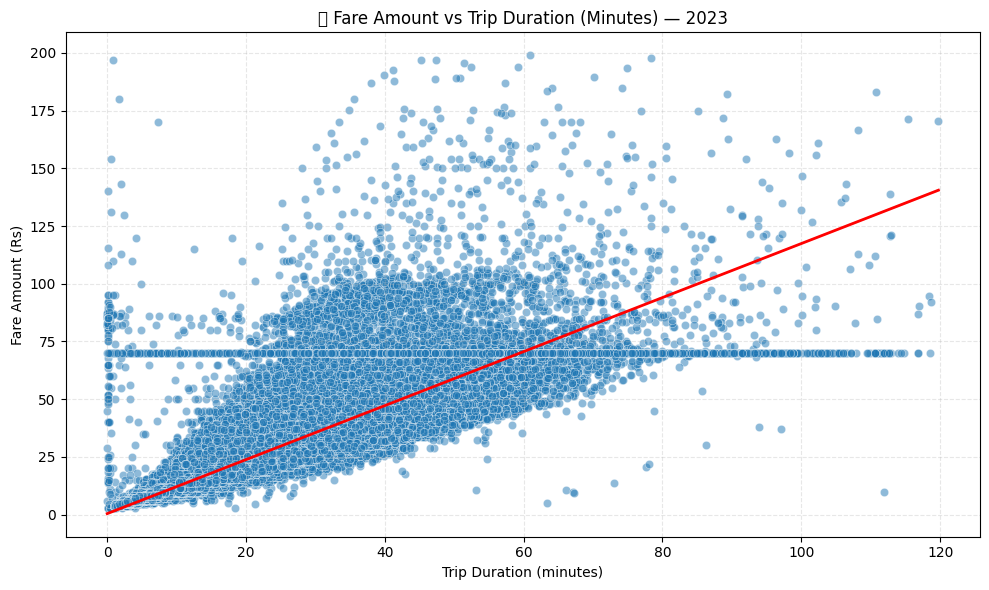

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_duration_min', y='fare_amount', alpha=0.5)
sns.regplot(data=filtered_df, x='trip_duration_min', y='fare_amount', scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('🕒 Fare Amount vs Trip Duration (Minutes) — 2023')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (Rs)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
correlation = filtered_df['trip_duration_min'].corr(filtered_df['fare_amount'])
print(f"📊 Correlation between fare amount and trip duration (in minutes): {correlation:.4f}")

📊 Correlation between fare amount and trip duration (in minutes): 0.8727


In [ ]:
# Show relationship between fare and number of passengers
df_2023 = df_non_zero[
    (df_non_zero['tpep_pickup_datetime'].dt.year == 2023) &
    (df_non_zero['passenger_count'] > 0) &
    (df_non_zero['passenger_count'] <= 6)]


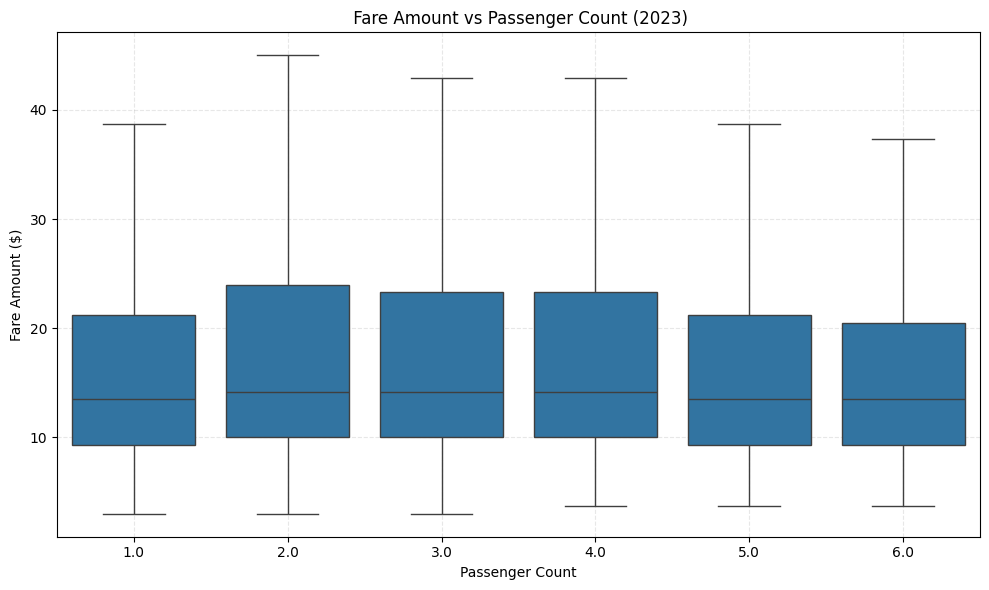

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2023, x='passenger_count', y='fare_amount', showfliers=False)

plt.title(' Fare Amount vs Passenger Count (2023)')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Show relationship between tip and trip distance
df_2023_tips = df_non_zero[
    (df_non_zero['tpep_pickup_datetime'].dt.year == 2023) &
    (df_non_zero['trip_distance'] > 0) &
    (df_non_zero['trip_distance'] < 100) &  # remove outliers
    (df_non_zero['tip_amount'] < 100)       # remove tip outliers
]


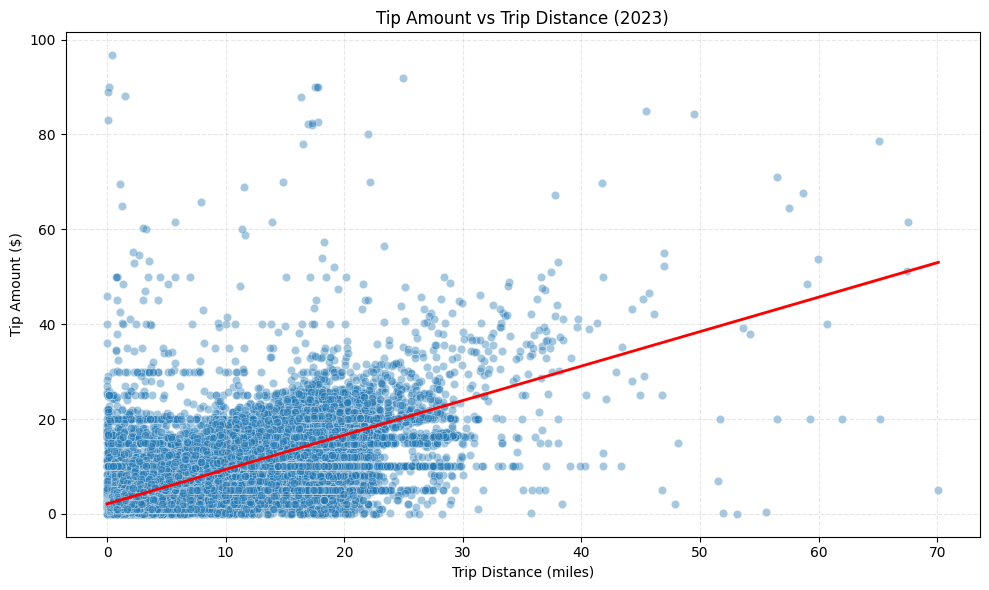

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2023_tips, x='trip_distance', y='tip_amount', alpha=0.4)
sns.regplot(data=df_2023_tips, x='trip_distance', y='tip_amount', scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Tip Amount vs Trip Distance (2023)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
correlation = df_2023_tips['trip_distance'].corr(df_2023_tips['tip_amount'])
print(f"📊 Correlation between trip distance and tip amount (2023): {correlation:.4f}")

📊 Correlation between trip distance and tip amount (2023): 0.8066


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).
# Count and percentage
payment_counts = df_non_zero['payment_type'].value_counts().sort_index()
payment_percent = df_non_zero['payment_type'].value_counts(normalize=True).sort_index() * 100

# Combine into one DataFrame
payment_distribution = pd.DataFrame({
    'Count': payment_counts,
    'Percentage': payment_percent.round(2)
})
print(payment_distribution)



               Count  Percentage
payment_type                    
1             279899       100.0
2                  5         0.0
3                  1         0.0
4                  5         0.0


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/sample_data/Taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

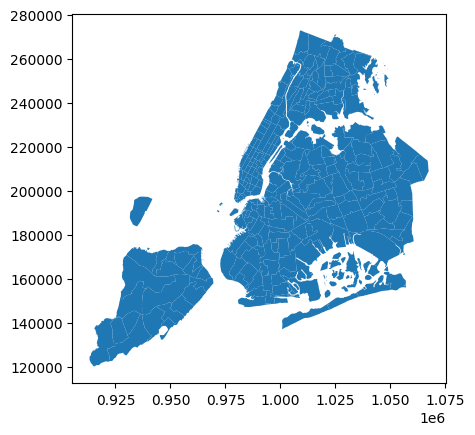

In [ ]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
# Step 1: Ensure column types match
df_trips = pd.read_csv('/content/cleaned_non_zero_data-130825.csv')
df_trips['PULocationID'] = df_trips['PULocationID'].astype(int)
zones['LocationID'] = zones['LocationID'].astype(int)

# Step 2: Merge on PULocationID with LocationID from zones
df_merged = df_trips.merge(zones[['LocationID', 'zone', 'borough']],
                           left_on='PULocationID',
                           right_on='LocationID',
                           how='left')

# Step 3: Optionally rename columns
df_merged.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

# Preview merged data
df_merged.head()




,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,hour,Airport_fee_N,pickup_hour,pickup_dayofweek,pickup_day_name,pickup_month,pickup_month_name,LocationID,pickup_zone,pickup_borough
0,2,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,10.93,1.0,132,61,1,47.1,...,0,1.75,0,5,Sat,7,Jul,132.0,JFK Airport,Queens
1,2,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,10.49,1.0,230,95,1,45.7,...,0,0.00,0,5,Sat,7,Jul,230.0,Times Sq/Theatre District,Manhattan
2,2,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.42,1.0,107,162,1,8.6,...,0,0.00,0,5,Sat,7,Jul,107.0,Gramercy,Manhattan
3,2,2023-07-01 00:37:46,2023-07-01 00:45:30,3.0,1.10,1.0,249,79,1,9.3,...,0,0.00,0,5,Sat,7,Jul,249.0,West Village,Manhattan
4,2,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.20,1.0,142,41,1,18.4,...,0,0.00,0,5,Sat,7,Jul,142.0,Lincoln Square East,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
grouped_data = df_merged.groupby(['LocationID', 'pickup_zone', 'pickup_borough']).size().reset_index(name='total_trips')
grouped_data.to_csv('grouped_data_130825.csv', index=False)
print("Data saved as grouped_data_130825.csv")

Data saved as grouped_data_130825.csv


In [ ]:
from google.colab import files
files.download("grouped_data_130825.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
grouped_data.head()

,LocationID,pickup_zone,pickup_borough,total_trips
0,1.0,Newark Airport,EWR,7
1,4.0,Alphabet City,Manhattan,267
2,6.0,Arrochar/Fort Wadsworth,Staten Island,1
3,7.0,Astoria,Queens,48
4,9.0,Auburndale,Queens,1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge the trip data into zones GeoDataFrame
merged_zones = zones.merge(
    grouped_data[['LocationID', 'total_trips']],
    on='LocationID',
    how='left'
)

# Fill missing trip values with 0
merged_zones['total_trips'] = merged_zones['total_trips'].fillna(0)

# Save merged file
merged_zones.to_csv('merged_zones_130825.csv', index=False)
print(" Merged data saved as 'merged_zones_130825.csv'")


 Merged data saved as 'merged_zones_130825.csv'


In [ ]:
merged_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",7.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",0.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",267.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0.0


In [ ]:
df= pd.read_csv("merged_zones_130825.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBJECTID     263 non-null    int64  
 1   Shape_Leng   263 non-null    float64
 2   Shape_Area   263 non-null    float64
 3   zone         263 non-null    object 
 4   LocationID   263 non-null    int64  
 5   borough      263 non-null    object 
 6   geometry     263 non-null    object 
 7   total_trips  263 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 16.6+ KB


In [ ]:
from google.colab import files
files.download("merged_zones_130825.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

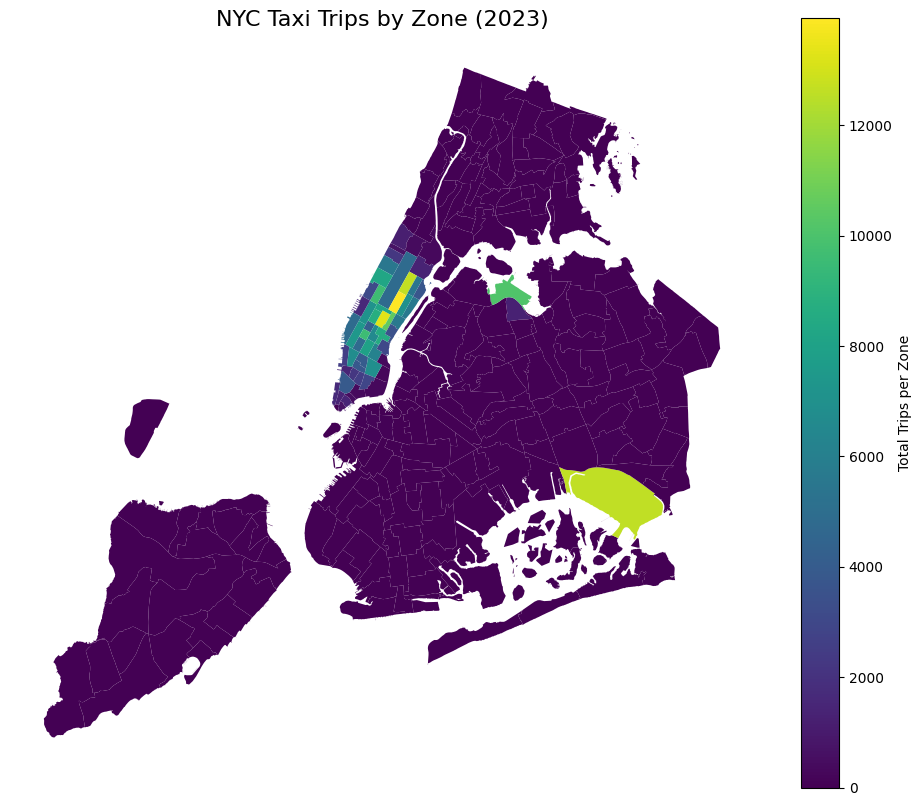

In [ ]:
# Define figure and axis
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt


zones = pd.read_csv("/content/merged_zones_130825.csv")
zones['geometry'] = zones['geometry'].apply(wkt.loads)
zones = gpd.GeoDataFrame(zones, geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones.plot(
    column='total_trips',
    ax=ax,
    cmap='viridis',
    legend=True,
    legend_kwds={
        'label': "Total Trips per Zone",
        'orientation': "vertical"
    }
)

ax.set_title("NYC Taxi Trips by Zone (2023)", fontsize=16)
ax.axis('off')
plt.show()






In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones.sort_values(by='total_trips', ascending=False)

# Display the top 10 zones with the most trips
print(sorted_zones[['LocationID', 'zone', 'borough', 'total_trips']].head(10))

     LocationID                          zone    borough  total_trips
236         237         Upper East Side South  Manhattan      13951.0
160         161                Midtown Center  Manhattan      13307.0
235         236         Upper East Side North  Manhattan      12658.0
131         132                   JFK Airport     Queens      12633.0
161         162                  Midtown East  Manhattan      10565.0
137         138             LaGuardia Airport     Queens      10104.0
141         142           Lincoln Square East  Manhattan       9621.0
185         186  Penn Station/Madison Sq West  Manhattan       9579.0
229         230     Times Sq/Theatre District  Manhattan       8743.0
169         170                   Murray Hill  Manhattan       8536.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
import pandas as pd

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration_hr'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

df = df[(df['trip_duration_hr'] > 0) & (df['trip_distance'] > 0)]

df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour and route
grouped = df.groupby(['hour', 'PULocationID', 'DOLocationID']).agg({
    'trip_distance': 'mean',
    'trip_duration_hr': 'mean'
}).reset_index()

# Calculate average speed (mph)
grouped['avg_speed_mph'] = grouped['trip_distance'] / grouped['trip_duration_hr']

# Sort by slowest speeds
slow_routes = grouped.sort_values(by='avg_speed_mph').reset_index(drop=True)

# Display slowest routes (optional: top 10)
print(slow_routes[['hour', 'PULocationID', 'DOLocationID', 'avg_speed_mph']].head(10))


   hour  PULocationID  DOLocationID  avg_speed_mph
0    18           226           145       0.026569
1    17           260           129       0.040746
2    15           264           237       0.043036
3    22           113           235       0.048105
4     8            50            43       0.059525
5    23           148            45       0.066307
6    15           134           265       0.073831
7    13           113           113       0.074370
8     0            88           144       0.074923
9     6            70           138       0.085750


How does identifying high-traffic, high-demand routes help us?

In [ ]:
slow_routes.to_csv("slow_routes_by_hour_130825.csv", index=False)
from google.colab import files
files.download("slow_routes_by_hour_130825.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

🚕 Busiest hour: 18:00 with 25392 trips


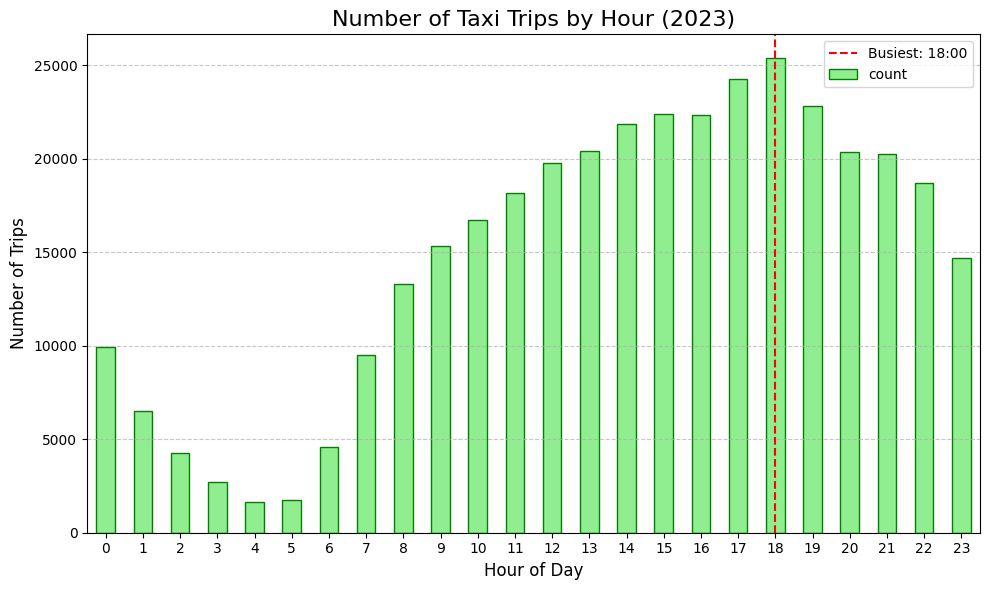

In [ ]:
# Visualise the number of trips per hour and find the busiest hour

import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Count number of trips per hour
hourly_counts = df['hour'].value_counts().sort_index()

# Find busiest hour
busiest_hour = hourly_counts.idxmax()
busiest_count = hourly_counts.max()

print(f"🚕 Busiest hour: {busiest_hour}:00 with {busiest_count} trips")

# Plot trips by hour
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='lightgreen', edgecolor='green')
plt.title("Number of Taxi Trips by Hour (2023)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest: {busiest_hour}:00')
plt.legend()
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips
import pandas as pd

# Get top 5 busiest hours
top_5_hours = hourly_counts.head(5)

# Print result sorted by hour for clarity
print("Top 5 Busiest Hours (Sampled Data):")
print(top_5_hours.sort_index())


Top 5 Busiest Hours (Sampled Data):
hour
15    225
16    255
17    234
18    247
19    233
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
import pandas as pd

# Compare traffic trends for the week days and weekends
df = pd.read_csv("/content/cleaned_non_zero_data-130825.csv")
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour and day of week (0=Mon, 6=Sun)
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Separate into weekday and weekend
weekday_df = df[df['day_of_week'] < 5]
weekend_df = df[df['day_of_week'] >= 5]

# Count number of trips per hour
weekday_counts = weekday_df['hour'].value_counts().sort_index()
weekend_counts = weekend_df['hour'].value_counts().sort_index()

weekend_counts.head()

,count
hour,
0,4091
1,3400
2,2400
3,1533
4,706


In [ ]:
weekday_counts.head()


,count
hour,
0,3856
1,1808
2,879
3,502
4,412


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones
import pandas as pd

# Load merged_zones.csv (zone names & IDs)
zones_df = pd.read_csv('/content/merged_zones_130825.csv')

zone_lookup = zones_df[['LocationID', 'zone']]

# --- Top 10 Pickup Zones ---
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']
pickup_counts = pickup_counts.merge(zone_lookup, on='LocationID', how='left')
top_pickups = pickup_counts[['zone', 'pickup_count']].head(10)

# --- Top 10 Dropoff Zones ---
dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']
dropoff_counts = dropoff_counts.merge(zone_lookup, on='LocationID', how='left')
top_dropoffs = dropoff_counts[['zone', 'dropoff_count']].head(10)

# Display results
print(" Top 10 Pickup Zones:")
print(top_pickups.to_string(index=False))

print("\n Top 10 Dropoff Zones:")
print(top_dropoffs.to_string(index=False))



 Top 10 Pickup Zones:
                        zone  pickup_count
       Upper East Side South         13951
              Midtown Center         13307
       Upper East Side North         12658
                 JFK Airport         12633
                Midtown East         10565
           LaGuardia Airport         10104
         Lincoln Square East          9621
Penn Station/Madison Sq West          9579
   Times Sq/Theatre District          8743
                 Murray Hill          8536

 Top 10 Dropoff Zones:
                     zone  dropoff_count
    Upper East Side North          13413
    Upper East Side South          12390
           Midtown Center          10994
              Murray Hill           8631
    Upper West Side South           8440
      Lincoln Square East           8256
             Midtown East           8174
          Lenox Hill West           7924
Times Sq/Theatre District           7646
             East Chelsea           7205


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zones_df = pd.read_csv('/content/merged_zones_130825.csv')
import pandas as pd

# Step 1: Count pickups and dropoffs
pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

# Step 2: Combine counts into one DataFrame
zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Step 3: Calculate pickup/dropoff ratio
zone_counts['pickup_drop_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count'].replace(0, 1)

# Step 4: Convert index to column
zone_counts.reset_index(inplace=True)
zone_counts.rename(columns={'index': 'LocationID'}, inplace=True)

# Step 5: Merge with zone names
zones_df = pd.read_csv('/content/merged_zones_130825.csv')
zone_counts = zone_counts.merge(zones_df[['LocationID', 'zone']], on='LocationID', how='left')

# Step 6: Sort and show top/bottom 10
top_10 = zone_counts.sort_values(by='pickup_drop_ratio', ascending=False).head(10)
bottom_10 = zone_counts.sort_values(by='pickup_drop_ratio', ascending=True).head(10)

# Display results
print(" Top 10 Pickup/Dropoff Ratios:")
print(top_10[['zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']].to_string(index=False))

print("\n Bottom 10 Pickup/Dropoff Ratios:")
print(bottom_10[['zone', 'pickup_count', 'dropoff_count', 'pickup_drop_ratio']].to_string(index=False))


 Top 10 Pickup/Dropoff Ratios:
                        zone  pickup_count  dropoff_count  pickup_drop_ratio
               East Elmhurst        1271.0             92          13.815217
                 JFK Airport       12633.0           2633           4.797949
           LaGuardia Airport       10104.0           3454           2.925304
               South Jamaica          27.0             15           1.800000
Penn Station/Madison Sq West        9579.0           5932           1.614801
                Central Park        4848.0           3428           1.414236
                West Village        6803.0           5017           1.355990
     Greenwich Village South        3804.0           2843           1.338023
                Midtown East       10565.0           8174           1.292513
              Midtown Center       13307.0          10994           1.210387

 Bottom 10 Pickup/Dropoff Ratios:
                             zone  pickup_count  dropoff_count  pickup_drop_ratio
     

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
import pandas as pd

# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

# Filter night hours (11 PM to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]
pickup_night = df[df['pickup_hour'].isin(night_hours)]
dropoff_night = df[df['dropoff_hour'].isin(night_hours)]

# Count pickups and dropoffs per location
pickup_counts = pickup_night['PULocationID'].value_counts().rename('night_pickups')
dropoff_counts = dropoff_night['DOLocationID'].value_counts().rename('night_dropoffs')

# Merge counts
night_traffic = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
night_traffic['total_night_traffic'] = night_traffic['night_pickups'] + night_traffic['night_dropoffs']
night_traffic = night_traffic.reset_index().rename(columns={'index': 'LocationID'})

# Merge with zone names
zones = pd.read_csv('/content/merged_zones.csv')
night_traffic = night_traffic.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Top 10 zones
top10 = night_traffic.sort_values('total_night_traffic', ascending=False).head(10)
print(top10[['zone', 'night_pickups', 'night_dropoffs', 'total_night_traffic']].to_string(index=False))



                     zone  night_pickups  night_dropoffs  total_night_traffic
             East Village         2521.0            1444               3965.0
             West Village         2094.0             857               2951.0
             Clinton East         1523.0            1113               2636.0
          Lower East Side         1569.0             766               2335.0
              JFK Airport         1880.0             162               2042.0
                 Gramercy          914.0            1021               1935.0
             East Chelsea          906.0             962               1868.0
Times Sq/Theatre District         1219.0             640               1859.0
  Greenwich Village South         1364.0             451               1815.0
              Murray Hill          626.0            1090               1716.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
import pandas as pd

# Ensure datetime column is parsed correctly
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Define night hours: 11 PM to 5 AM
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter for night trips
night_df = df[df['pickup_hour'].isin(night_hours)]

# Preview filtered data
print(night_df[['tpep_pickup_datetime', 'PULocationID', 'DOLocationID', 'total_amount']].head())



  tpep_pickup_datetime  PULocationID  DOLocationID  total_amount
0  2023-09-01 00:19:27           132           163         98.40
1  2023-09-01 00:11:38           144           232         14.90
2  2023-09-01 00:41:08            79           263         28.92
3  2023-09-01 00:07:47            48           143         20.52
4  2023-09-01 00:46:19           233            33         37.32


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

import pandas as pd

# Filter out invalid entries
df_valid = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0) & (df['fare_amount'] > 0)]

# Calculate fare per mile per passenger
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_amount'] / (df_valid['trip_distance'] * df_valid['passenger_count'])

# Group by passenger count and compute average fare per mile per passenger
avg_fare_analysis = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Round for readability
avg_fare_analysis['fare_per_mile_per_passenger'] = avg_fare_analysis['fare_per_mile_per_passenger'].round(2)

# Display results
print("💰 Average Fare per Mile per Passenger by Passenger Count:")
print(avg_fare_analysis)



/tmp/ipython-input-11-2808408695.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile_per_passenger'] = df_valid['fare_amount'] / (df_valid['trip_distance'] * df_valid['passenger_count'])


💰 Average Fare per Mile per Passenger by Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                         9.28
1              2.0                         5.02
2              3.0                         3.33
3              4.0                         3.85
4              5.0                         1.59
5              6.0                         1.28


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime is parsed
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter invalid rows (0 distance or fare)
df_valid = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Extract day of week and hour
df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.day_name()
df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour



/tmp/ipython-input-3383760290.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fare_day.index, y=avg_fare_day.values, palette="coolwarm")


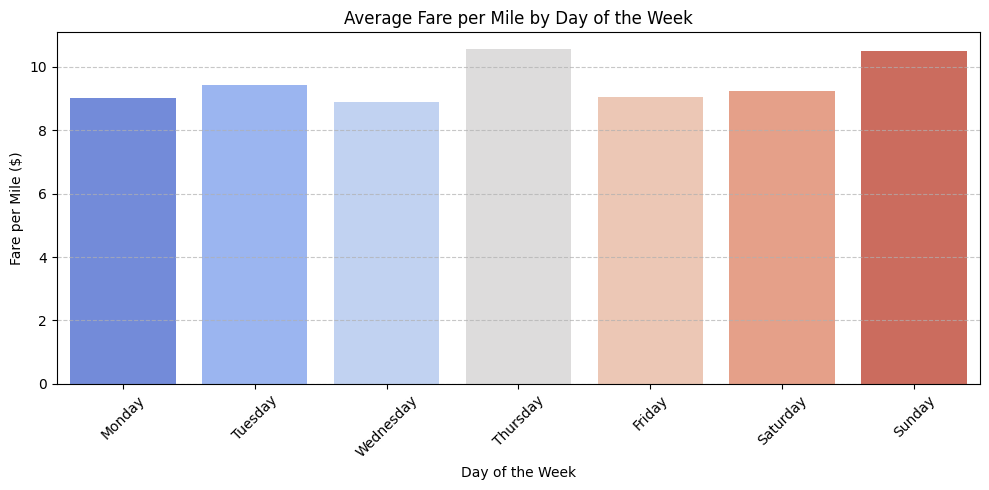

In [ ]:
avg_fare_day = df_valid.groupby('day_of_week')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_fare_day.index, y=avg_fare_day.values, palette="coolwarm")
plt.title("Average Fare per Mile by Day of the Week")
plt.ylabel("Fare per Mile ($)")
plt.xlabel("Day of the Week")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


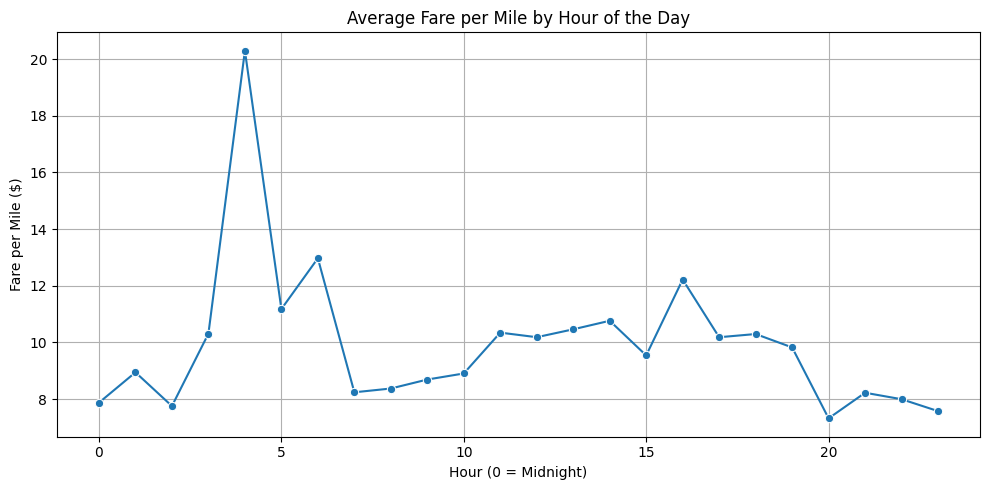

In [ ]:
avg_fare_hour = df_valid.groupby('pickup_hour')['fare_per_mile'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_hour.index, y=avg_fare_hour.values, marker='o')
plt.title("Average Fare per Mile by Hour of the Day")
plt.xlabel("Hour (0 = Midnight)")
plt.ylabel("Fare per Mile ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter out invalid trips
df_valid = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Step 2: Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Step 3: Group by VendorID and calculate average fare per mile
avg_fare_by_vendor = df_valid.groupby('VendorID')['fare_per_mile'].mean().reset_index()
avg_fare_by_vendor['fare_per_mile'] = avg_fare_by_vendor['fare_per_mile'].round(2)

# Step 4: Display result
print("Average Fare per Mile by Vendor:")
print(avg_fare_by_vendor)


Average Fare per Mile by Vendor:
   VendorID  fare_per_mile
0         1           7.88
1         2          10.07


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
#Defining distance tiers
# Ensure trip_distance is numeric and positive
import pandas as pd

# division errors
df = df[df['trip_distance'] > 0]

# fare per mile calculation
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

#  defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return '≤ 2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '> 5 miles'

df['distance_tier'] = df['trip_distance'].apply(distance_tier)

# Group by Vendor and tier
tiered_fare_analysis = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

tiered_fare_analysis = tiered_fare_analysis.sort_values(['VendorID', 'distance_tier'])
print(tiered_fare_analysis)


   VendorID distance_tier  fare_per_mile
0         1     2–5 miles       6.383094
1         1     > 5 miles       4.415002
2         1     ≤ 2 miles      13.456515
3         2     2–5 miles       6.538884
4         2     > 5 miles       4.485204
5         2     ≤ 2 miles      17.931167
6         6     2–5 miles       7.577496
7         6     > 5 miles       4.158280
8         6     ≤ 2 miles      26.912698


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#Analyze tip percentages based on distances, passenger counts and pickup times
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)]

# tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
# Ensure datetime format
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

def distance_tier(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df['distance_tier'] = df['trip_distance'].apply(distance_tier)

# tip% by  Distance
avg_by_distance = df.groupby('distance_tier')['tip_percentage'].mean().reset_index()

# tip% by Passenger Count
avg_by_passengers = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# tip% by  Pickup Hour
avg_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

print("\nAverage Tip % by Distance:")
print(avg_by_distance)
print("\nAverage Tip % by Passenger Count:")
print(avg_by_passengers)
print("\nAverage Tip % by Pickup Hour:")
print(avg_by_hour)



Average Tip % by Distance:
  distance_tier  tip_percentage
0     0-2 miles       22.431854
1     2-5 miles       18.620331
2      >5 miles       16.439203

Average Tip % by Passenger Count:
   passenger_count  tip_percentage
0              0.0       20.428688
1              1.0       20.747675
2              2.0       19.716788
3              3.0       18.959984
4              4.0       17.350894
5              5.0       20.846781
6              6.0       20.575544
7              8.0       11.248594
8              9.0       20.000000

Average Tip % by Pickup Hour:
    pickup_hour  tip_percentage
0             0       20.315365
1             1       21.051085
2             2       20.031517
3             3       20.185180
4             4       17.476357
5             5       16.843062
6             6       18.931639
7             7       19.501728
8             8       19.865257
9             9       19.522222
10           10       19.309536
11           11       19.064456
12          

/tmp/ipython-input-354419052.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tip_comp, x='group', y='trip_distance', palette='coolwarm')


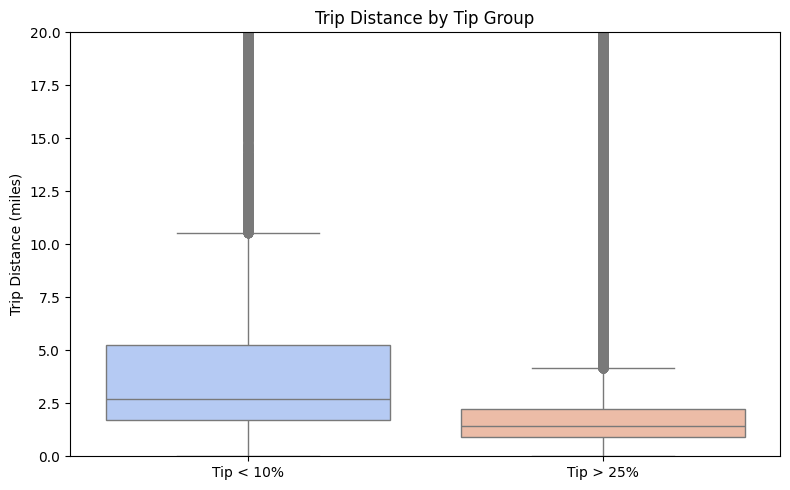

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and compute tip percentage
df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)]
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

# Define groups
low_tip = df[df['tip_percentage'] < 10].copy()
high_tip = df[df['tip_percentage'] > 25].copy()

# Plot 1: Trip Distance Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=tip_comp, x='group', y='trip_distance', palette='coolwarm')
plt.title("Trip Distance by Tip Group")
plt.ylabel("Trip Distance (miles)")
plt.xlabel("")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

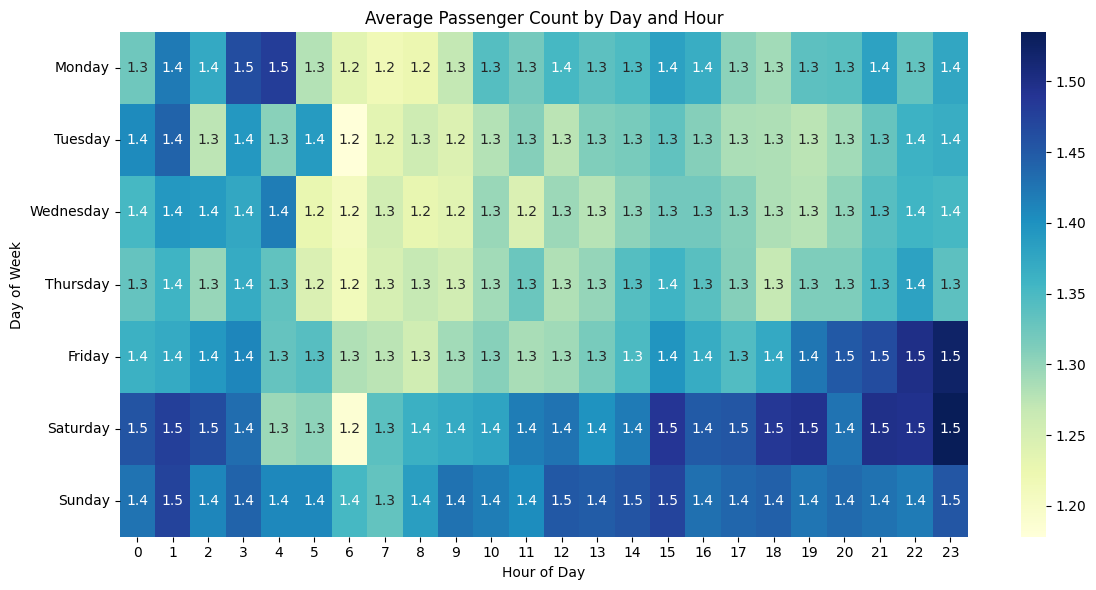

In [ ]:
# See how passenger count varies across hours and days

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert pickup datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour and day of week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# pivot table
pivot_table = df.pivot_table(
    index='pickup_day',
    columns='pickup_hour',
    values='passenger_count',
    aggfunc='mean'
).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title("Average Passenger Count by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

/tmp/ipython-input-3000760749.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_zones, x='PULocationID', y='avg_passenger_count', palette='viridis')


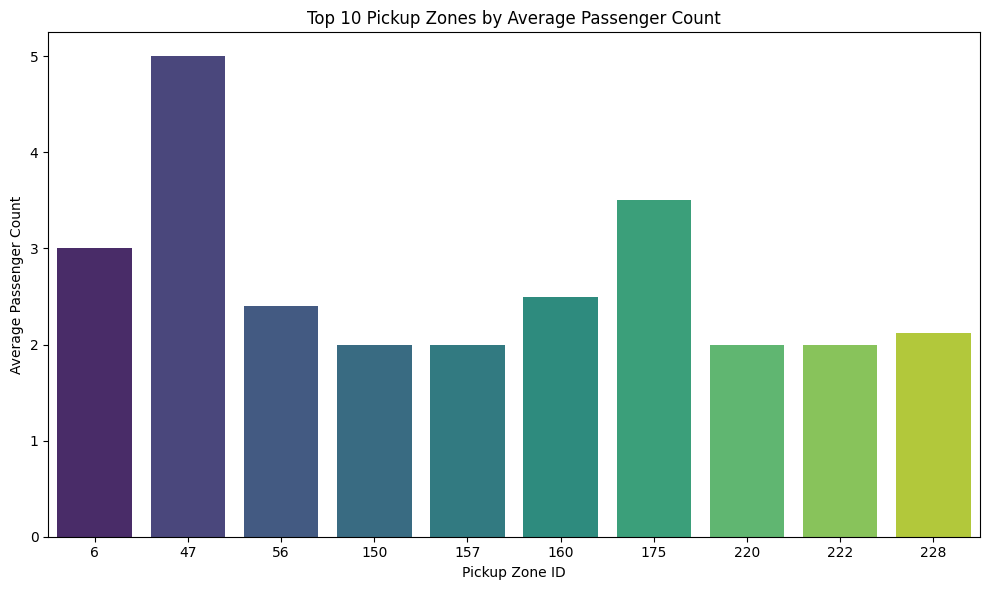

In [ ]:
# How does passenger count vary across zones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pickup zone (PULocationID) group by
zone_passenger_count = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
zone_passenger_count.columns = ['PULocationID', 'avg_passenger_count']

top_zones = zone_passenger_count.sort_values(by='avg_passenger_count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_zones, x='PULocationID', y='avg_passenger_count', palette='viridis')
plt.title("Top 10 Pickup Zones by Average Passenger Count")
plt.xlabel("Pickup Zone ID")
plt.ylabel("Average Passenger Count")
plt.tight_layout()
plt.show()



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Group original DataFrame by pickup location to get avg passenger count
import geopandas as gpd
zones_with_trips = gpd.read_file('/content/merged_zones_130825.csv')
zones_with_trips['LocationID'] = zones_with_trips['LocationID'].astype(int)
avg_passenger_by_zone = (
    df.groupby('PULocationID', as_index=False)['passenger_count']
    .mean()
    .rename(columns={'passenger_count': 'avg_passenger_count'})
)
zones_with_trips = zones_with_trips.merge(
    avg_passenger_by_zone,
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
)
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)
print(zones_with_trips[['LocationID', 'zone', 'avg_passenger_count']].head())



   LocationID                     zone  avg_passenger_count
0           1           Newark Airport             1.714286
1           2              Jamaica Bay             0.000000
2           3  Allerton/Pelham Gardens             0.000000
3           4            Alphabet City             1.393258
4           5            Arden Heights             0.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Surcharge Value Counts:
 extra
-2.50          1
 0.00     150075
 0.50          2
 0.75          3
 1.00      71676
 1.25        300
 1.50          1
 1.75        628
 2.00          6
 2.25        189
 2.45          3
 2.50      92623
 2.72          1
 2.75        423
 3.00          3
 3.20         11
 3.25          3
 3.50      21080
 3.75        538
 4.05          1
 4.25       1226
 4.75          2
 5.00      26539
 5.25          6
 6.00       3179
 6.25        155
 6.75        466
 6.80          1
 7.25         84
 7.50       3131
 7.75        283
 8.50         73
 8.75        414
 9.25       1228
 9.75         99
 10.00       105
 10.25       307
 11.25        90
 11.75       228
 12.50         1
 14.25         2
Name: count, dtype: int64


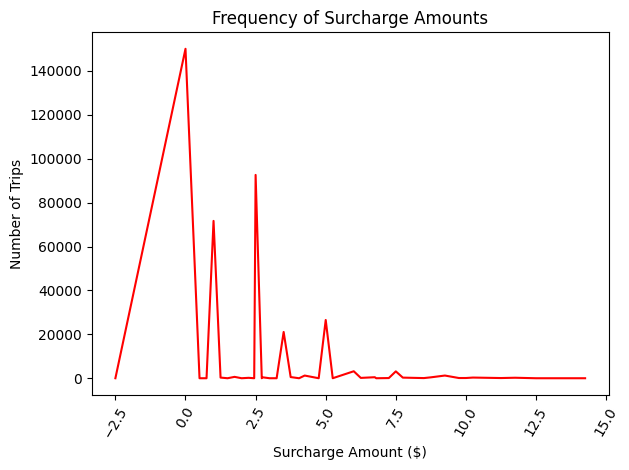

In [ ]:
# How often is each surcharge applied?
# Count how many times each surcharge total value appears
import pandas as pd
df = pd.read_parquet('/content/2023_1percent_sampled_data.parquet')
surcharge_counts = df['extra'].value_counts().sort_index()
# Display counts
print("Surcharge Value Counts:\n", surcharge_counts)

# Optional: visualize
import matplotlib.pyplot as plt

surcharge_counts.plot(kind='line', color='red')
plt.title("Frequency of Surcharge Amounts")
plt.xlabel("Surcharge Amount ($)")
plt.ylabel("Number of Trips")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Increase taxi availability during peak hours (7–9 AM, 4–7 PM) and midweek in high-demand zones (Upper East Side South, Midtown Center, JFK Airport.)
# Encourage ride acceptance during night hours from Friday to Sunday @ 11 PM–3 AM).
# Increase the taxi fleet during October- Dec ; Mar; May months.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# position the cabs
  # at Upper East Side (South/North), Midtown East/Center, Penn Station during 7- 9 AM .
  # Midtown Center/East, Times Square, Lincoln Square East during  4-7 PM
  # Fri–Sun 11 PM–3 AM – East Village, West Village, Times Square, East Chelsea, Murray Hill.
  # Airport areas of JFK & LaGuardia, especially 4–6 AM and evenings.
  # tourist areas during May and October

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Promote fixed-fare services for long trips to offset low tip percentages.
# Promte sharing the rides in low occupancy and low demand zones by pooling < 2 passengers to boost revenue.
# short-trip promotions during off-peak hours to leverage higher tipping rates.
# Launch loyalty incentives for frequent riders.
# Offer Fixed fare services with in certain distances (minimum fare amount).
# offer free rides during national holidays and female/ old riders upto 2 rides.
# Educate riders about tipping norms via in-cab displays, especially during long trips.
